In [1]:
import matplotlib.pyplot as plt
from XTSTree.XTSTreePageHinkley import XTSTreePageHinkley
from plot import plot
import pandas as pd
from matplotlib.ticker import ScalarFormatter
import numpy as np
from pysr import PySRRegressor
from statsmodels.tsa.stattools import adfuller
import os
from IPython.display import clear_output


In [2]:
series_boas = [
    # '5dias_umidrelmed2m_2021-01-05 _ 2021-01-10.csv',
    '5dias_umidrelmed2m_2020-08-08 _ 2020-08-13.csv',
    '5dias_umidrelmed2m_2016-06-23 _ 2016-06-28.csv',
    # '5dias_umidrelmed2m_2021-03-18 _ 2021-03-23.csv',
]

{0: [{'Root': 371}], 1: [{'L': 77}], 2: [{'LR': 215}], 3: [{'LRL': 114}, {'LRR': 305}]}


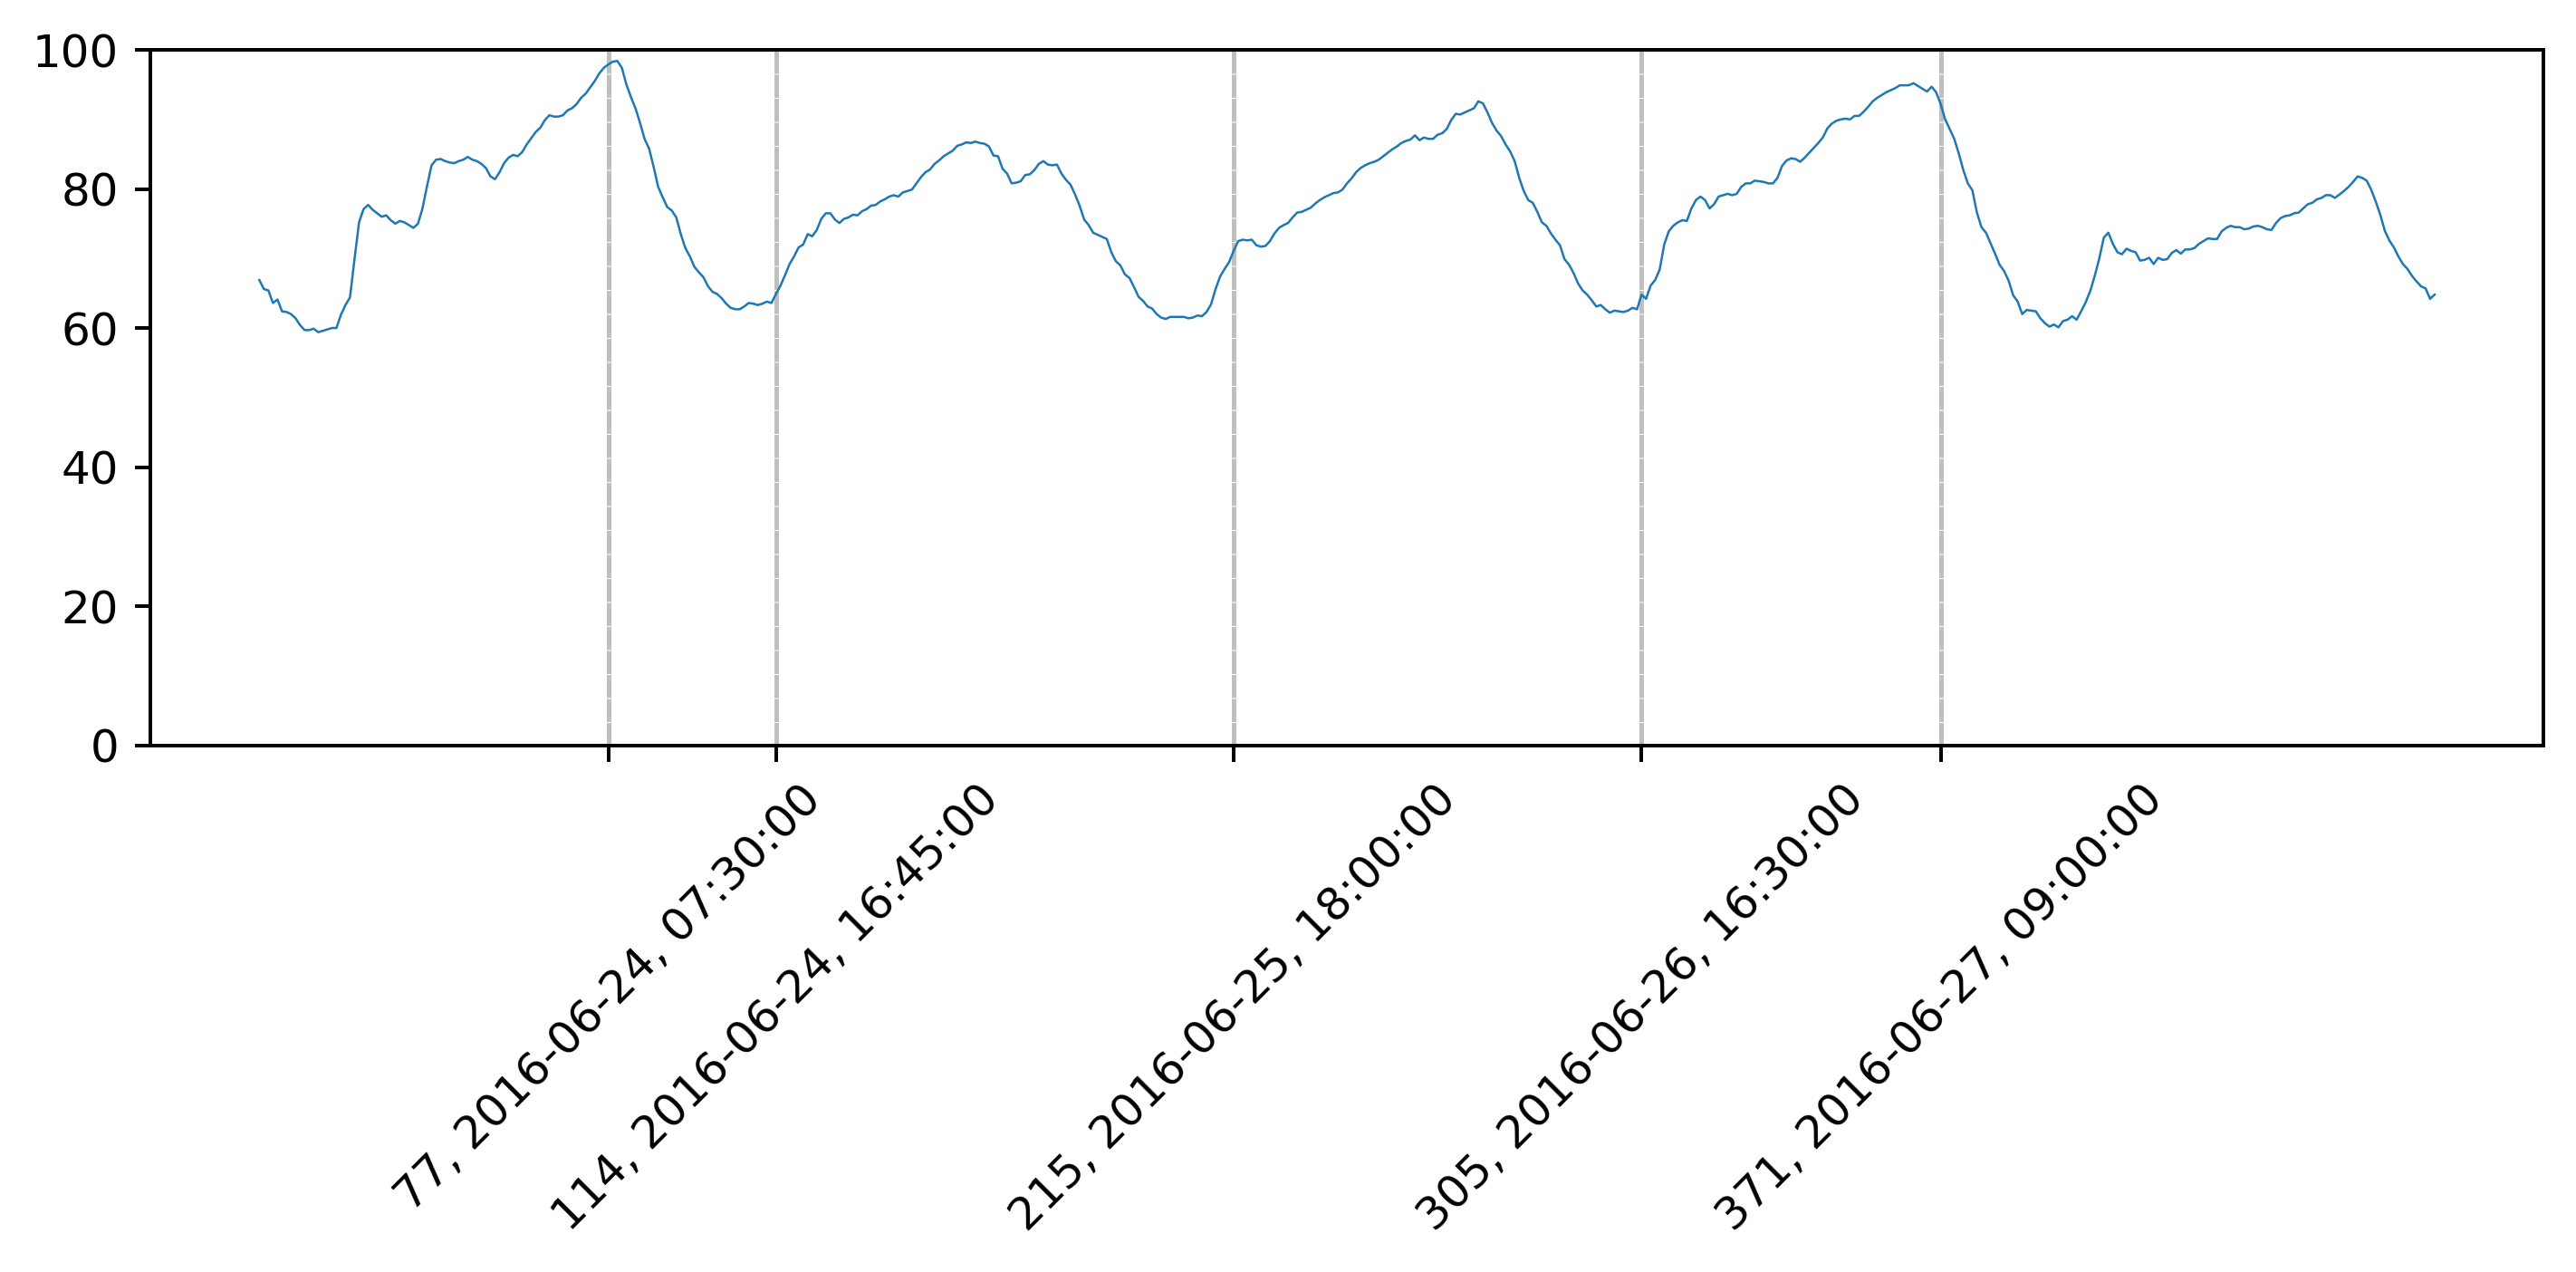

In [3]:
df = pd.read_csv(f'./datasets/umidrelmed2m/5dias/5dias_umidrelmed2m_2016-06-23 _ 2016-06-28.csv')
series = df[df.columns[-1]]
dates = np.array(df['date'])
hours = np.array(df['hour'])
series = np.where(np.isnan(series), 0, series)

# n = int(input())

# diff_pos_series = np.concatenate([
#     np.zeros(n),
#     np.array([series[i] - series[i-n+1] if series[i] > series[i-n+1] else 0 for i in range(n, len(series))])
# ])

# diff_neg_series = np.concatenate([
#     np.zeros(n),
#     np.abs(np.array([series[i] - series[i-n+1] if series[i] < series[i-n+1] else 0 for i in range(n, len(series))]))
# ])

model = XTSTreePageHinkley(stop_condition='adf', stop_val=0, max_iter=100, min_dist=30)
model = model.create_splits(series)

print(model.summary())

plot(
    series,
    # sec_plots=[[np.mean([val * np.power(0.999,j) for j, val in enumerate(series[:i])]) for i, _ in enumerate(series)]],
    figsize=(8, 4),
    divisions=model.cut_points(),
    labels= [{'x': i, 'label': f'{i}, {dates[i]}, {hours[i]}'} for i in model.cut_points()],
    max_y=100, min_y=0,
)

# plot(
#     diff_pos_series,
#     figsize=(8, 4),
#     divisions=model.cut_points(),
#     labels=[{'x': i, 'label': f'{i}, {dates[i]}, {hours[i]}'} for i in model.cut_points()]
# )
# plot(
#     np.cumsum(diff_pos_series),
#     figsize=(8, 4),
#     divisions=model.cut_points(),
#     labels=[{'x': i, 'label': f'{i}, {dates[i]}, {hours[i]}'} for i in model.cut_points()]
# )

# plot(
#     diff_neg_series,
#     figsize=(8, 4),
#     divisions=model.cut_points(),
#     labels=[{'x': i, 'label': f'{i}, {dates[i]}, {hours[i]}'} for i in model.cut_points()]
# )
# plot(
#     np.cumsum(diff_neg_series),
#     figsize=(8, 4),
#     divisions=model.cut_points(),
#     labels=[{'x': i, 'label': f'{i}, {dates[i]}, {hours[i]}'} for i in model.cut_points()]
# )

# diff_pos_series.argmax()+n, diff_pos_series.max(), diff_neg_series.argmax()+n, diff_neg_series.max()

Pos 75, dia: 2020-08-08 hora: 18:45:00
Pos 131, dia: 2020-08-09 hora: 08:45:00
Pos 168, dia: 2020-08-09 hora: 18:00:00
Pos 256, dia: 2020-08-10 hora: 16:00:00
Pos 421, dia: 2020-08-12 hora: 09:15:00
{0: [{'Root': 256}], 1: [{'L': 75}, {'R': 421}], 2: [{'LR': 131}], 3: [{'LRR': 168}]}


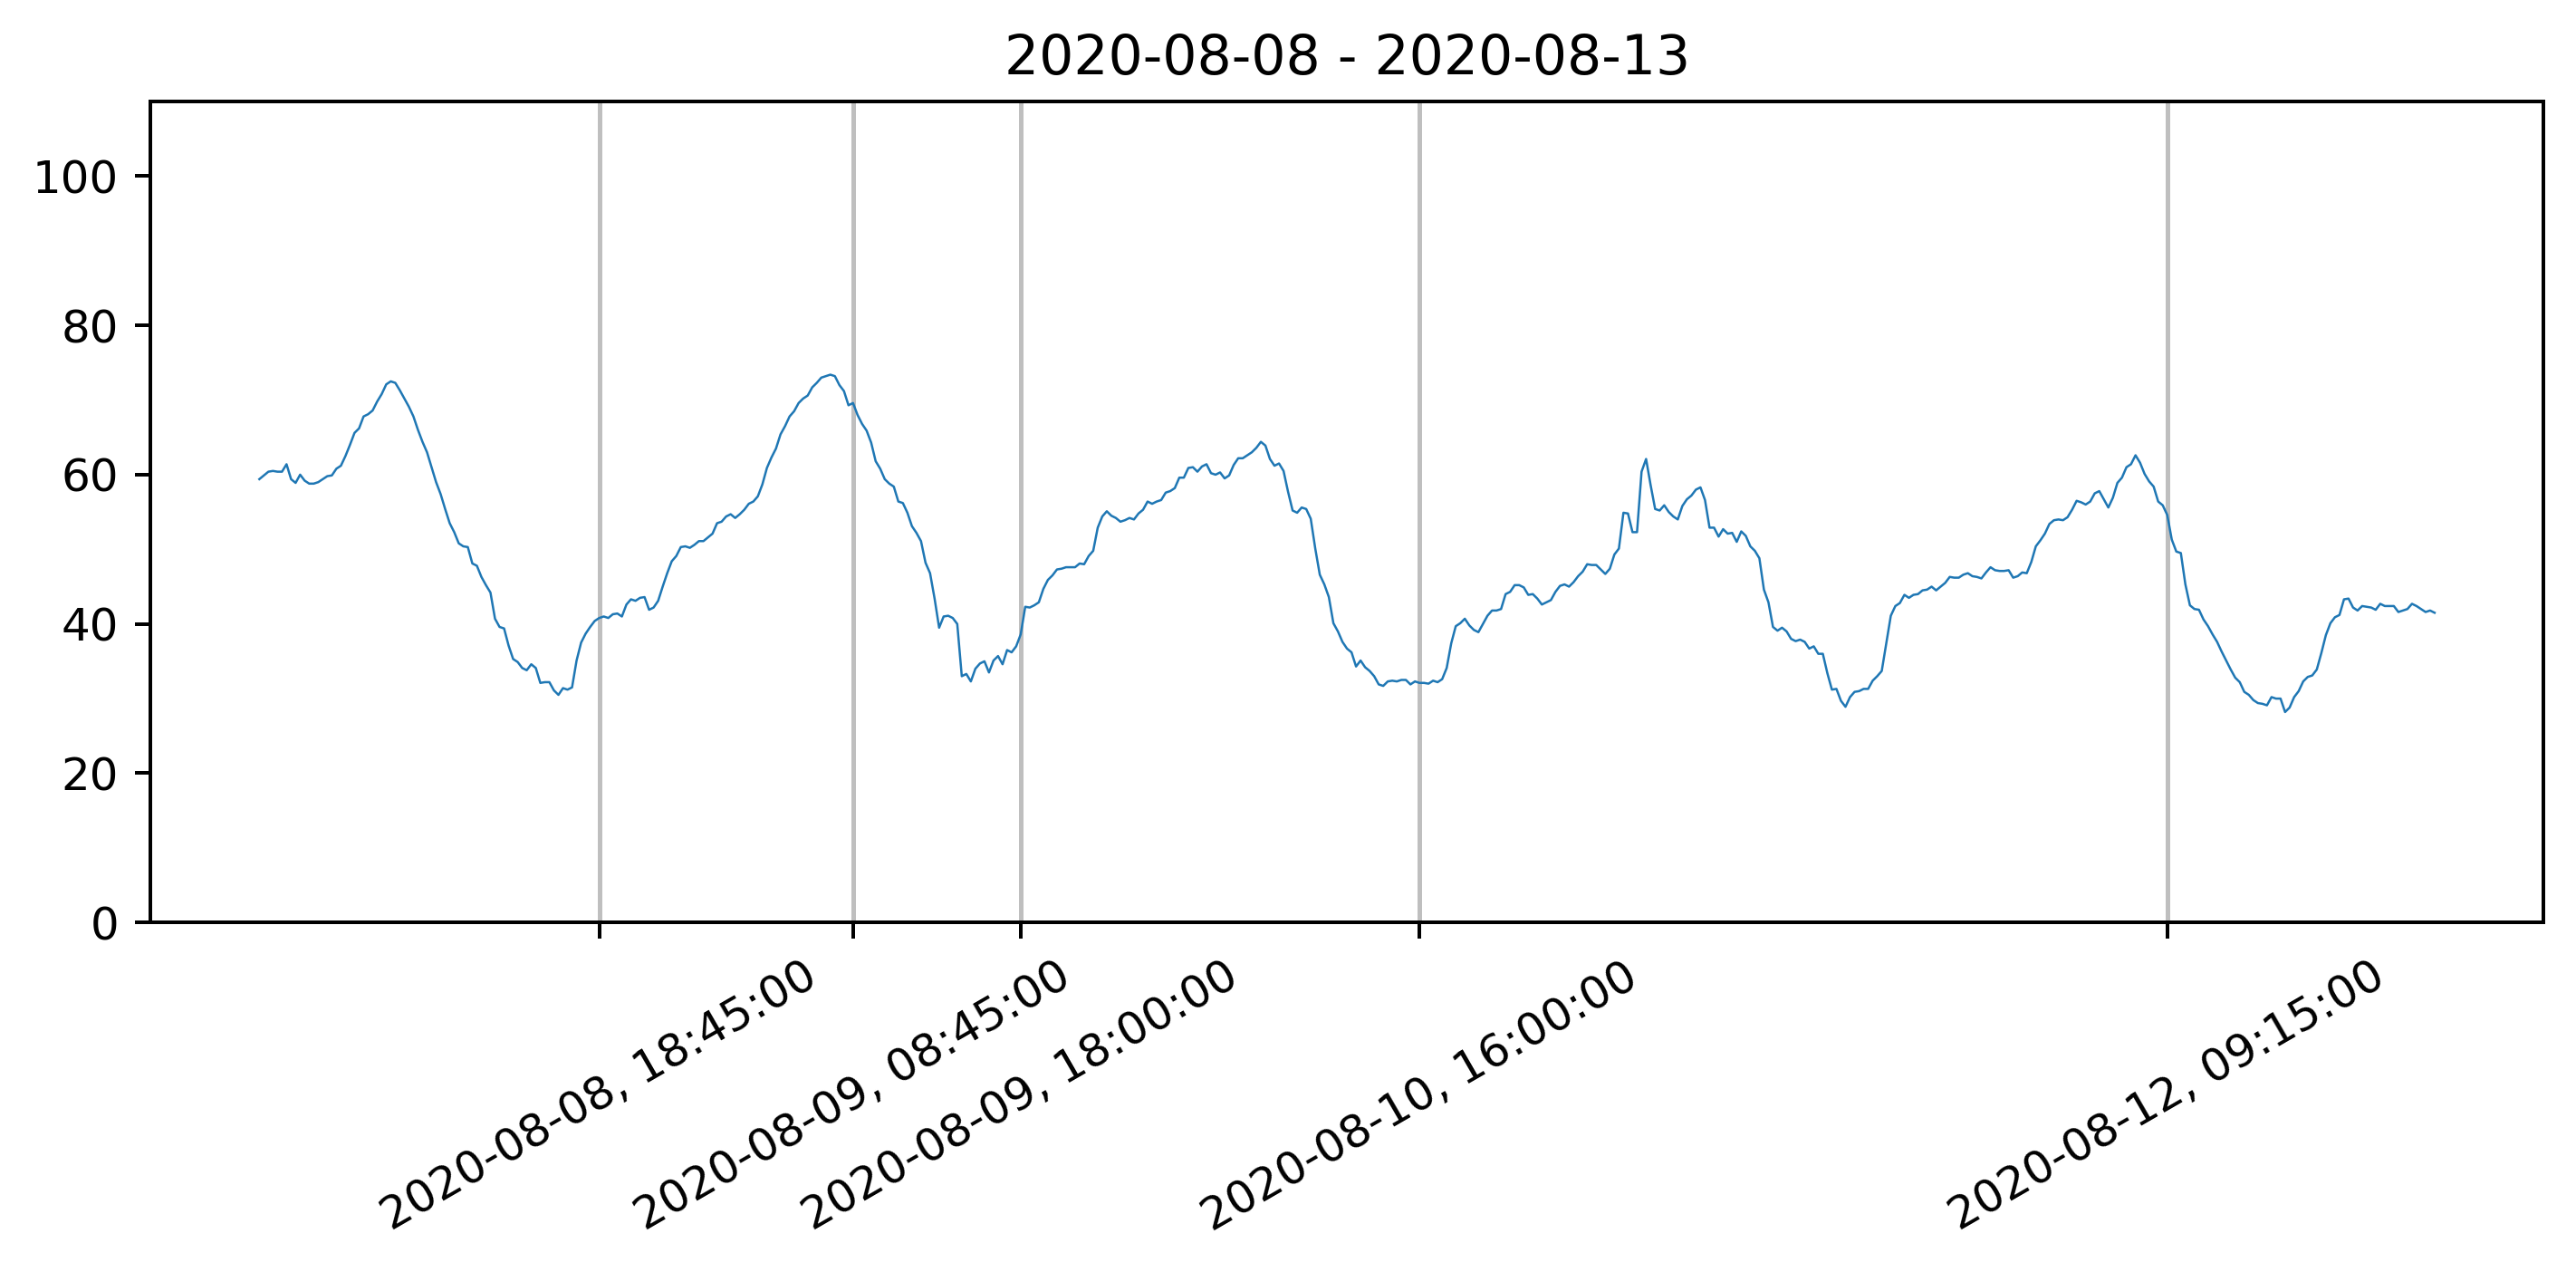

{0: [256], 1: [75, 421], 2: [131], 3: [168]}


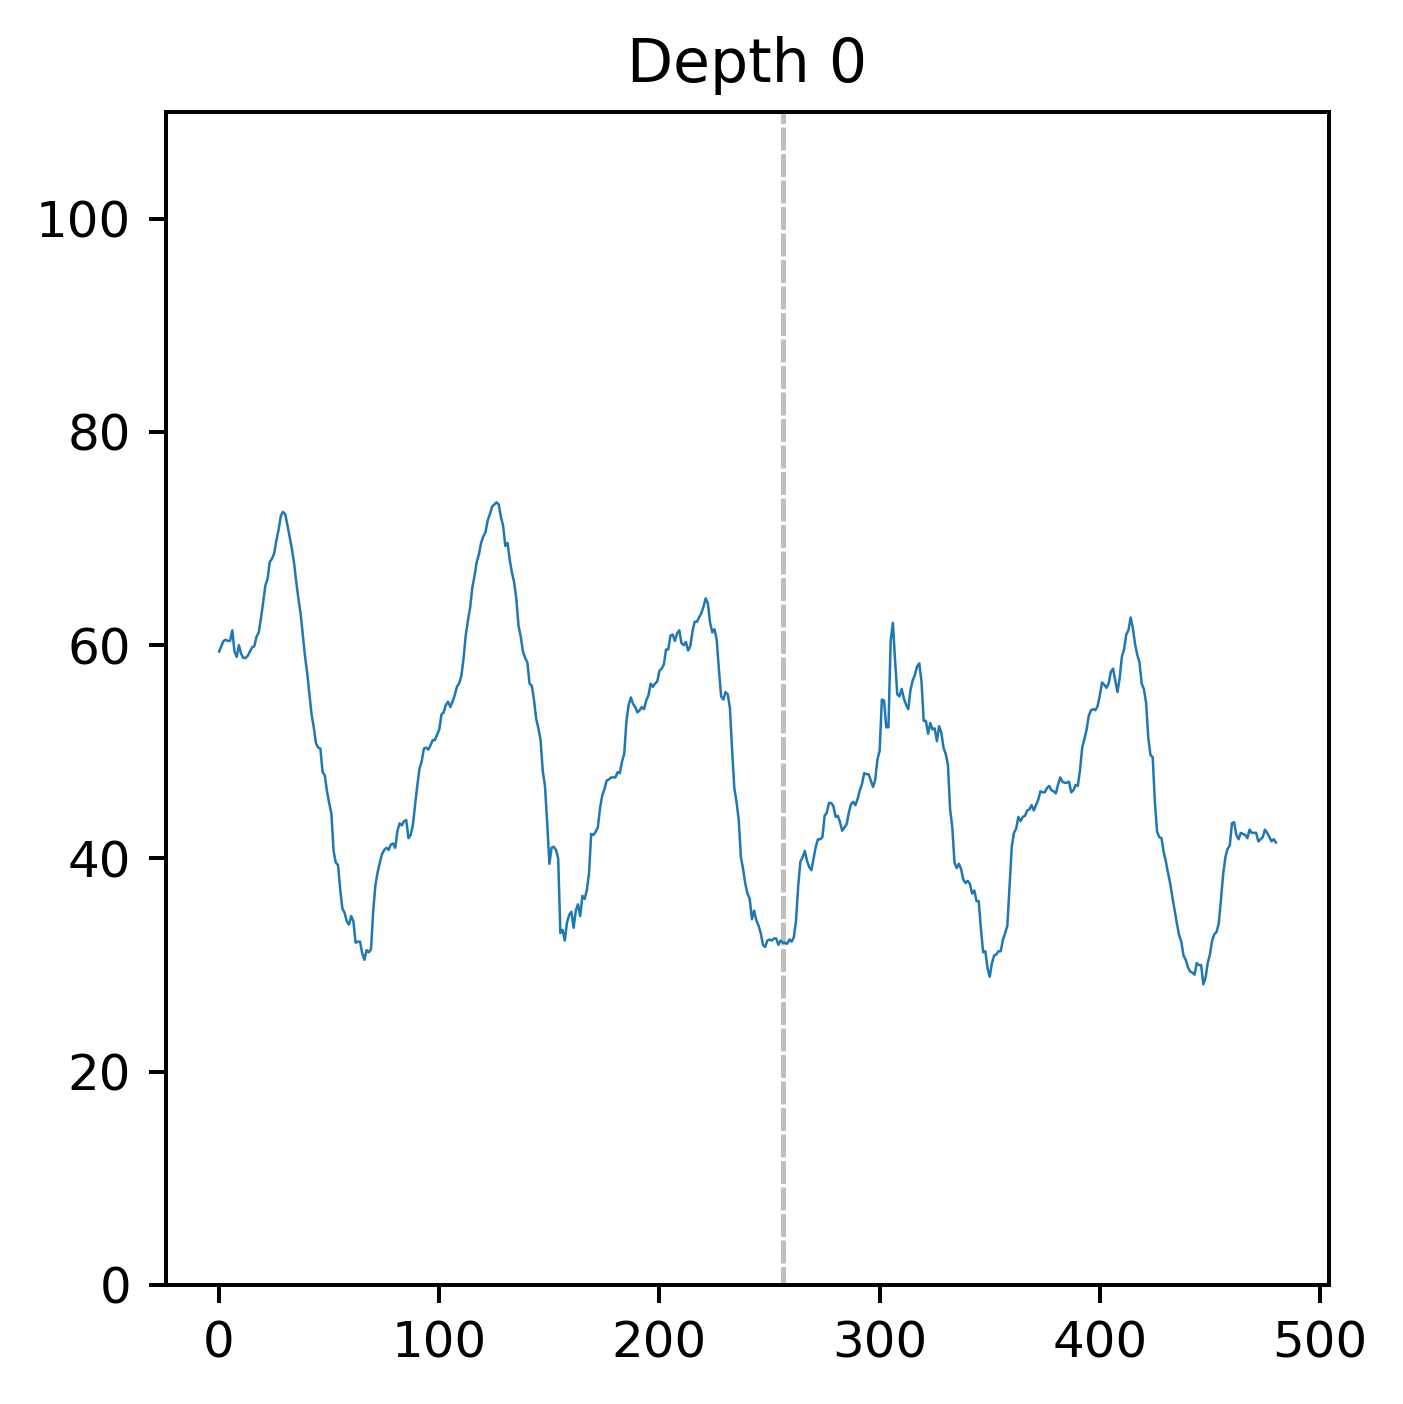

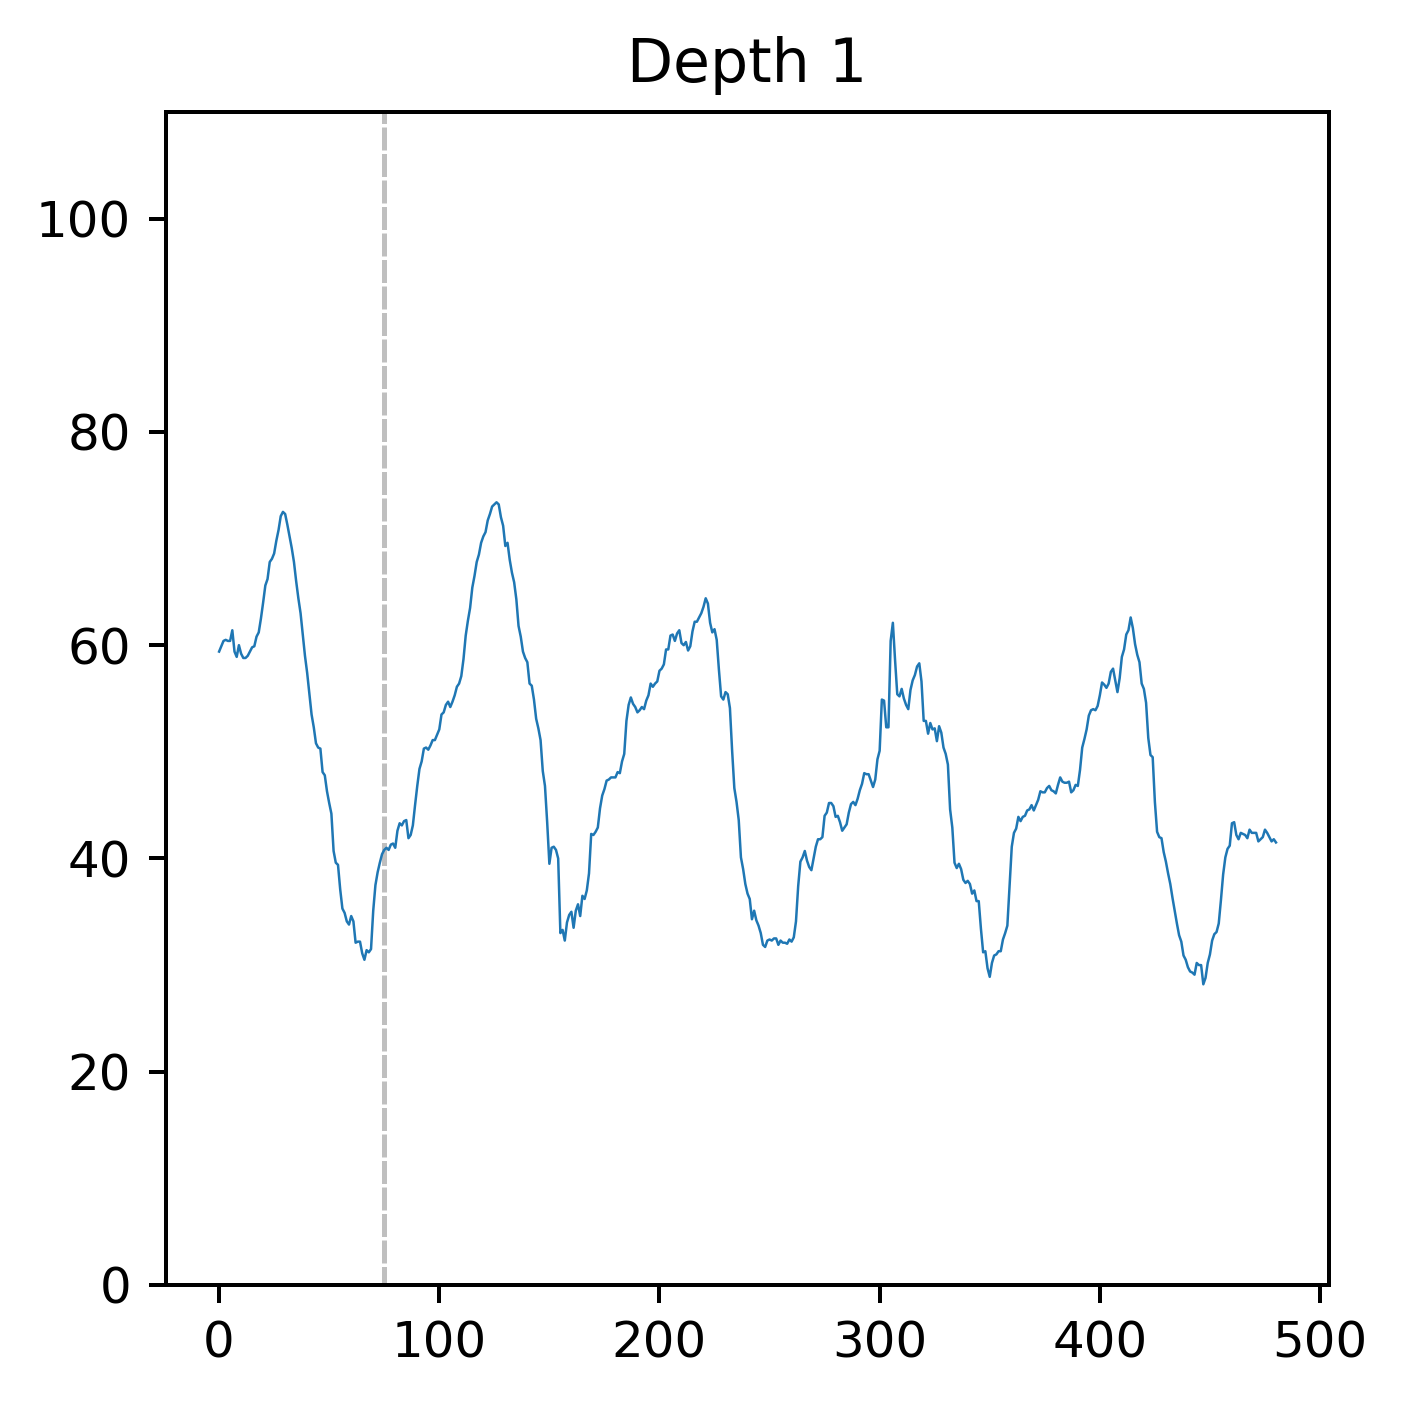

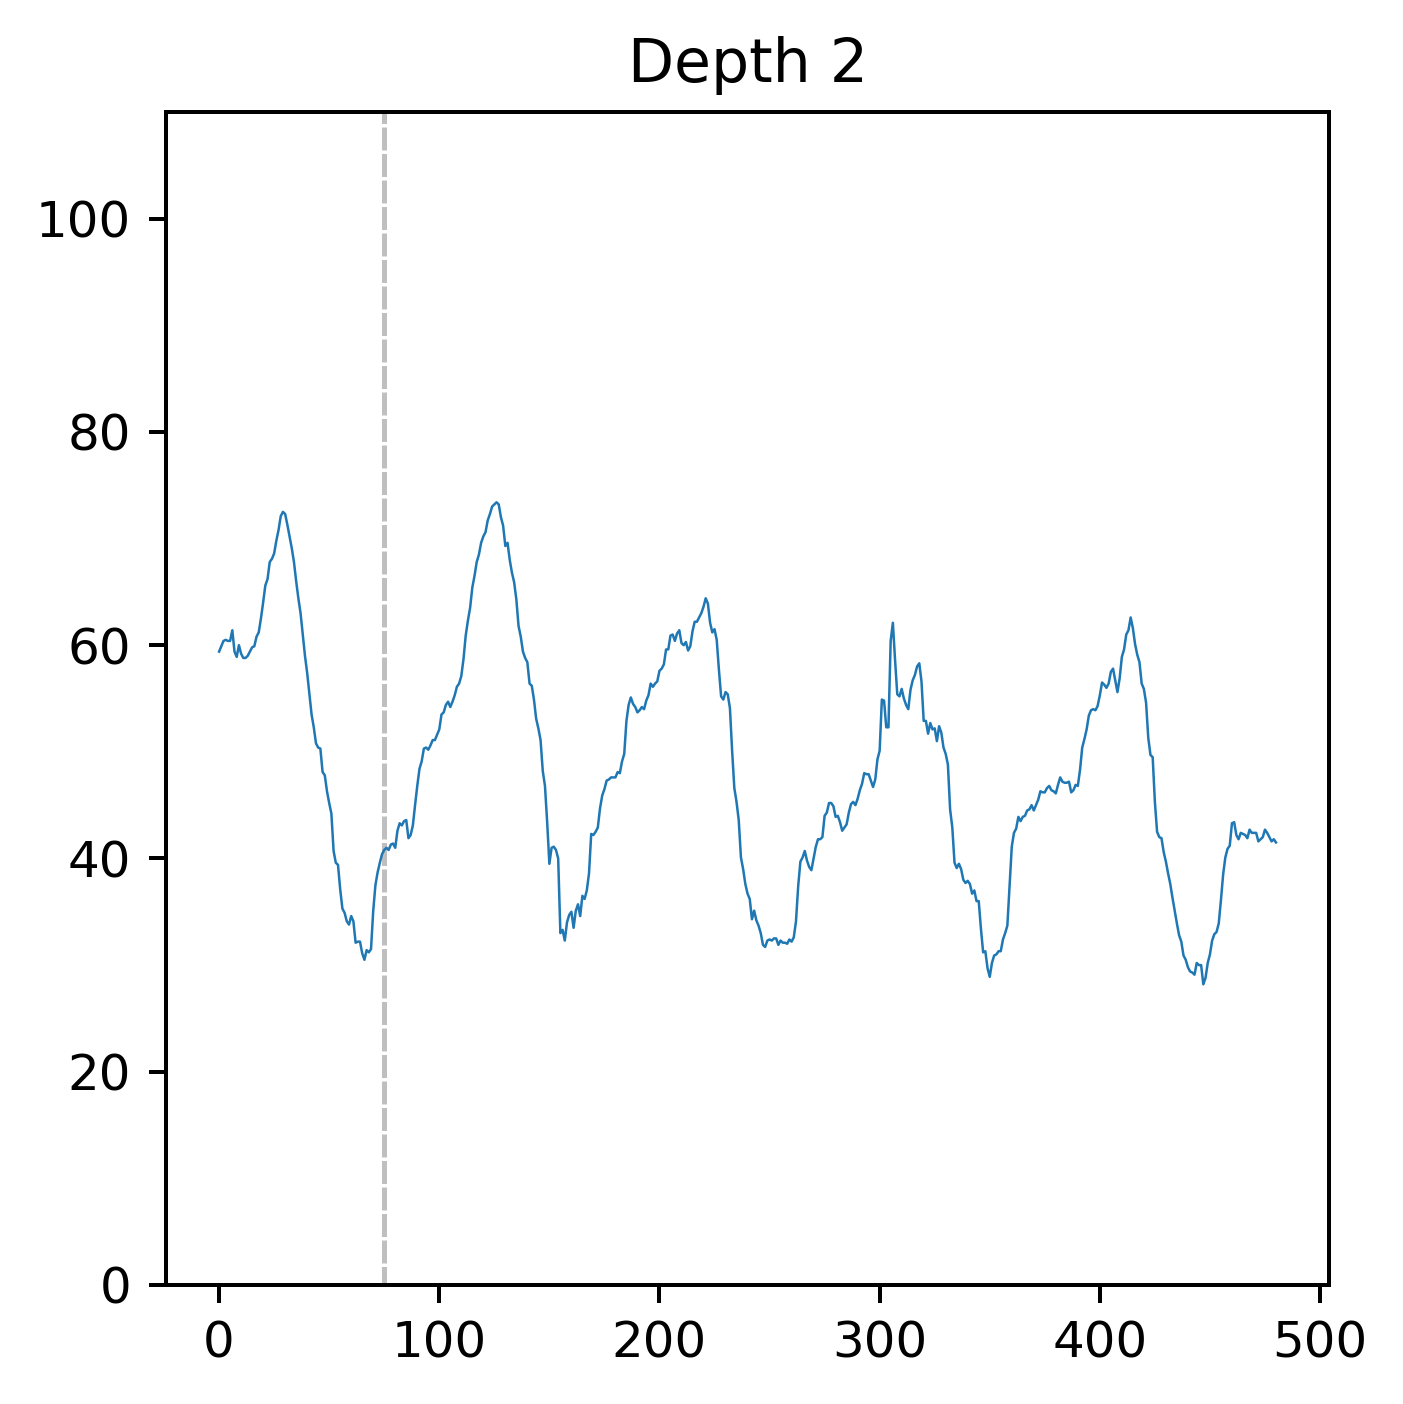

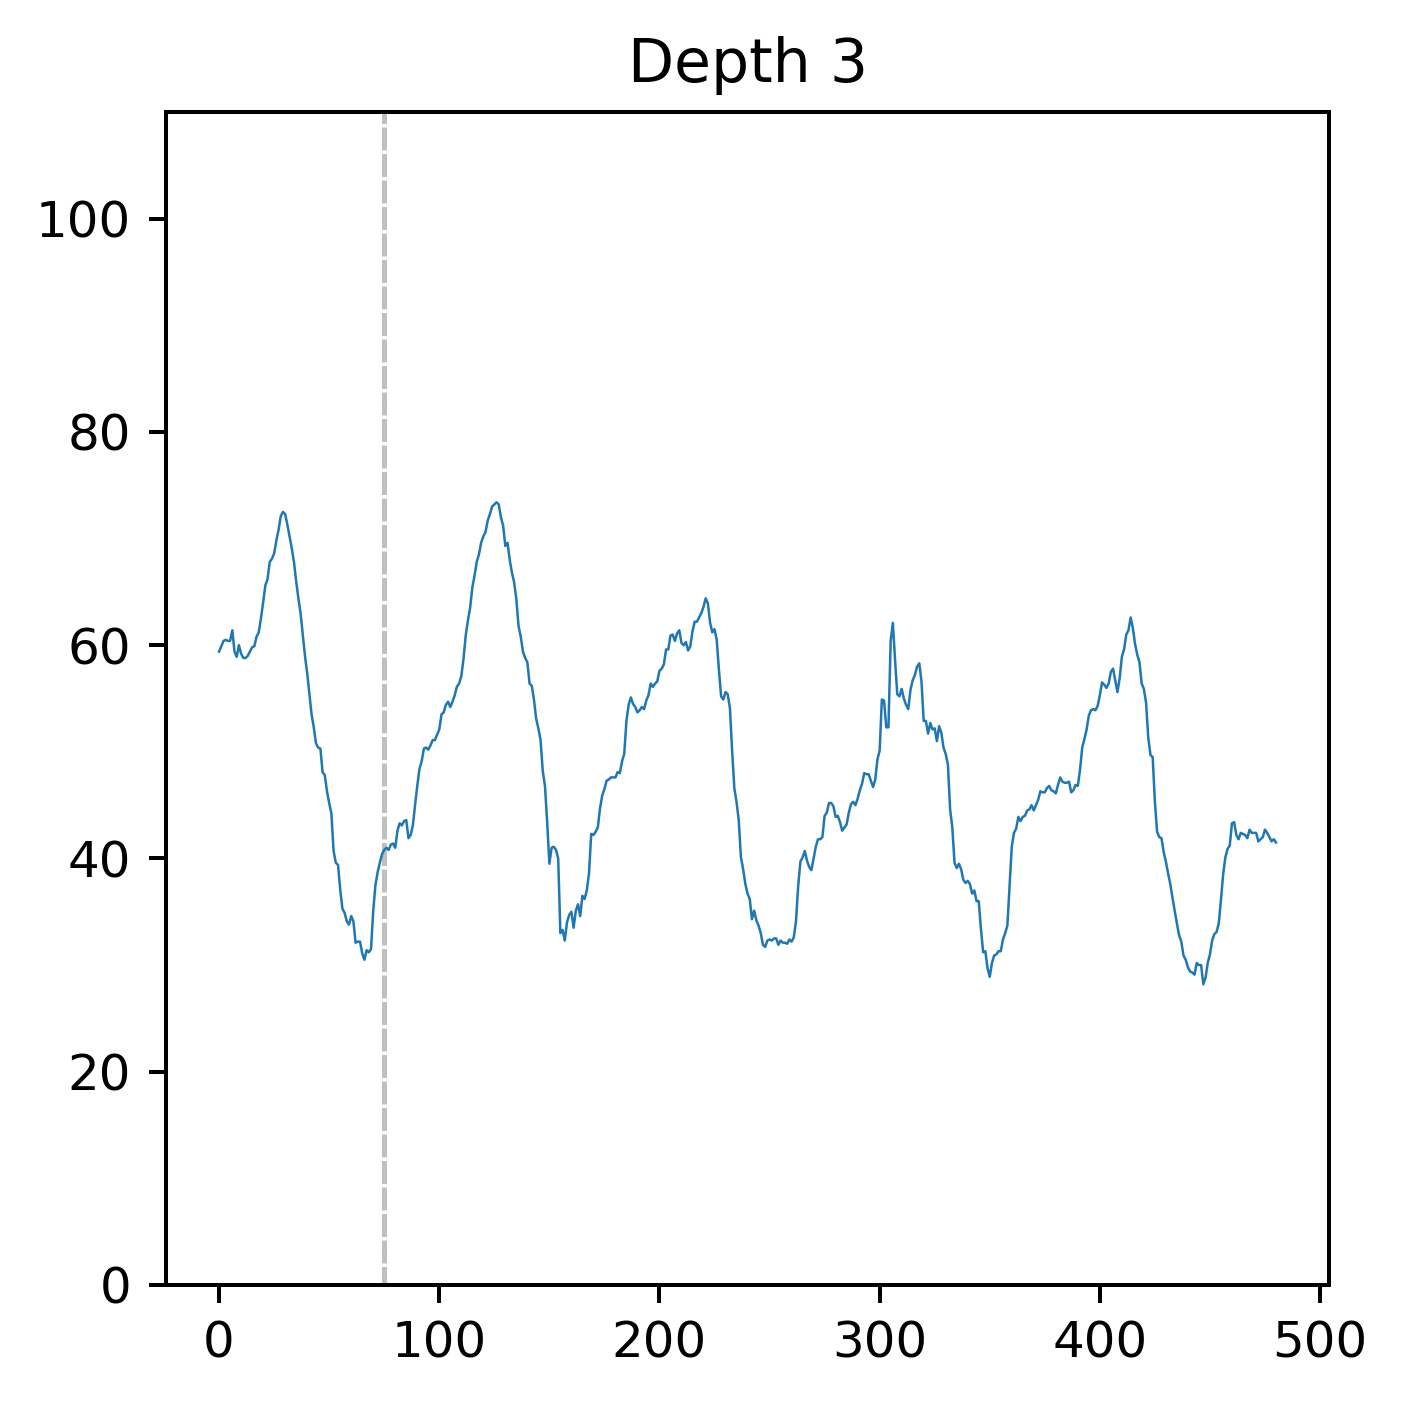

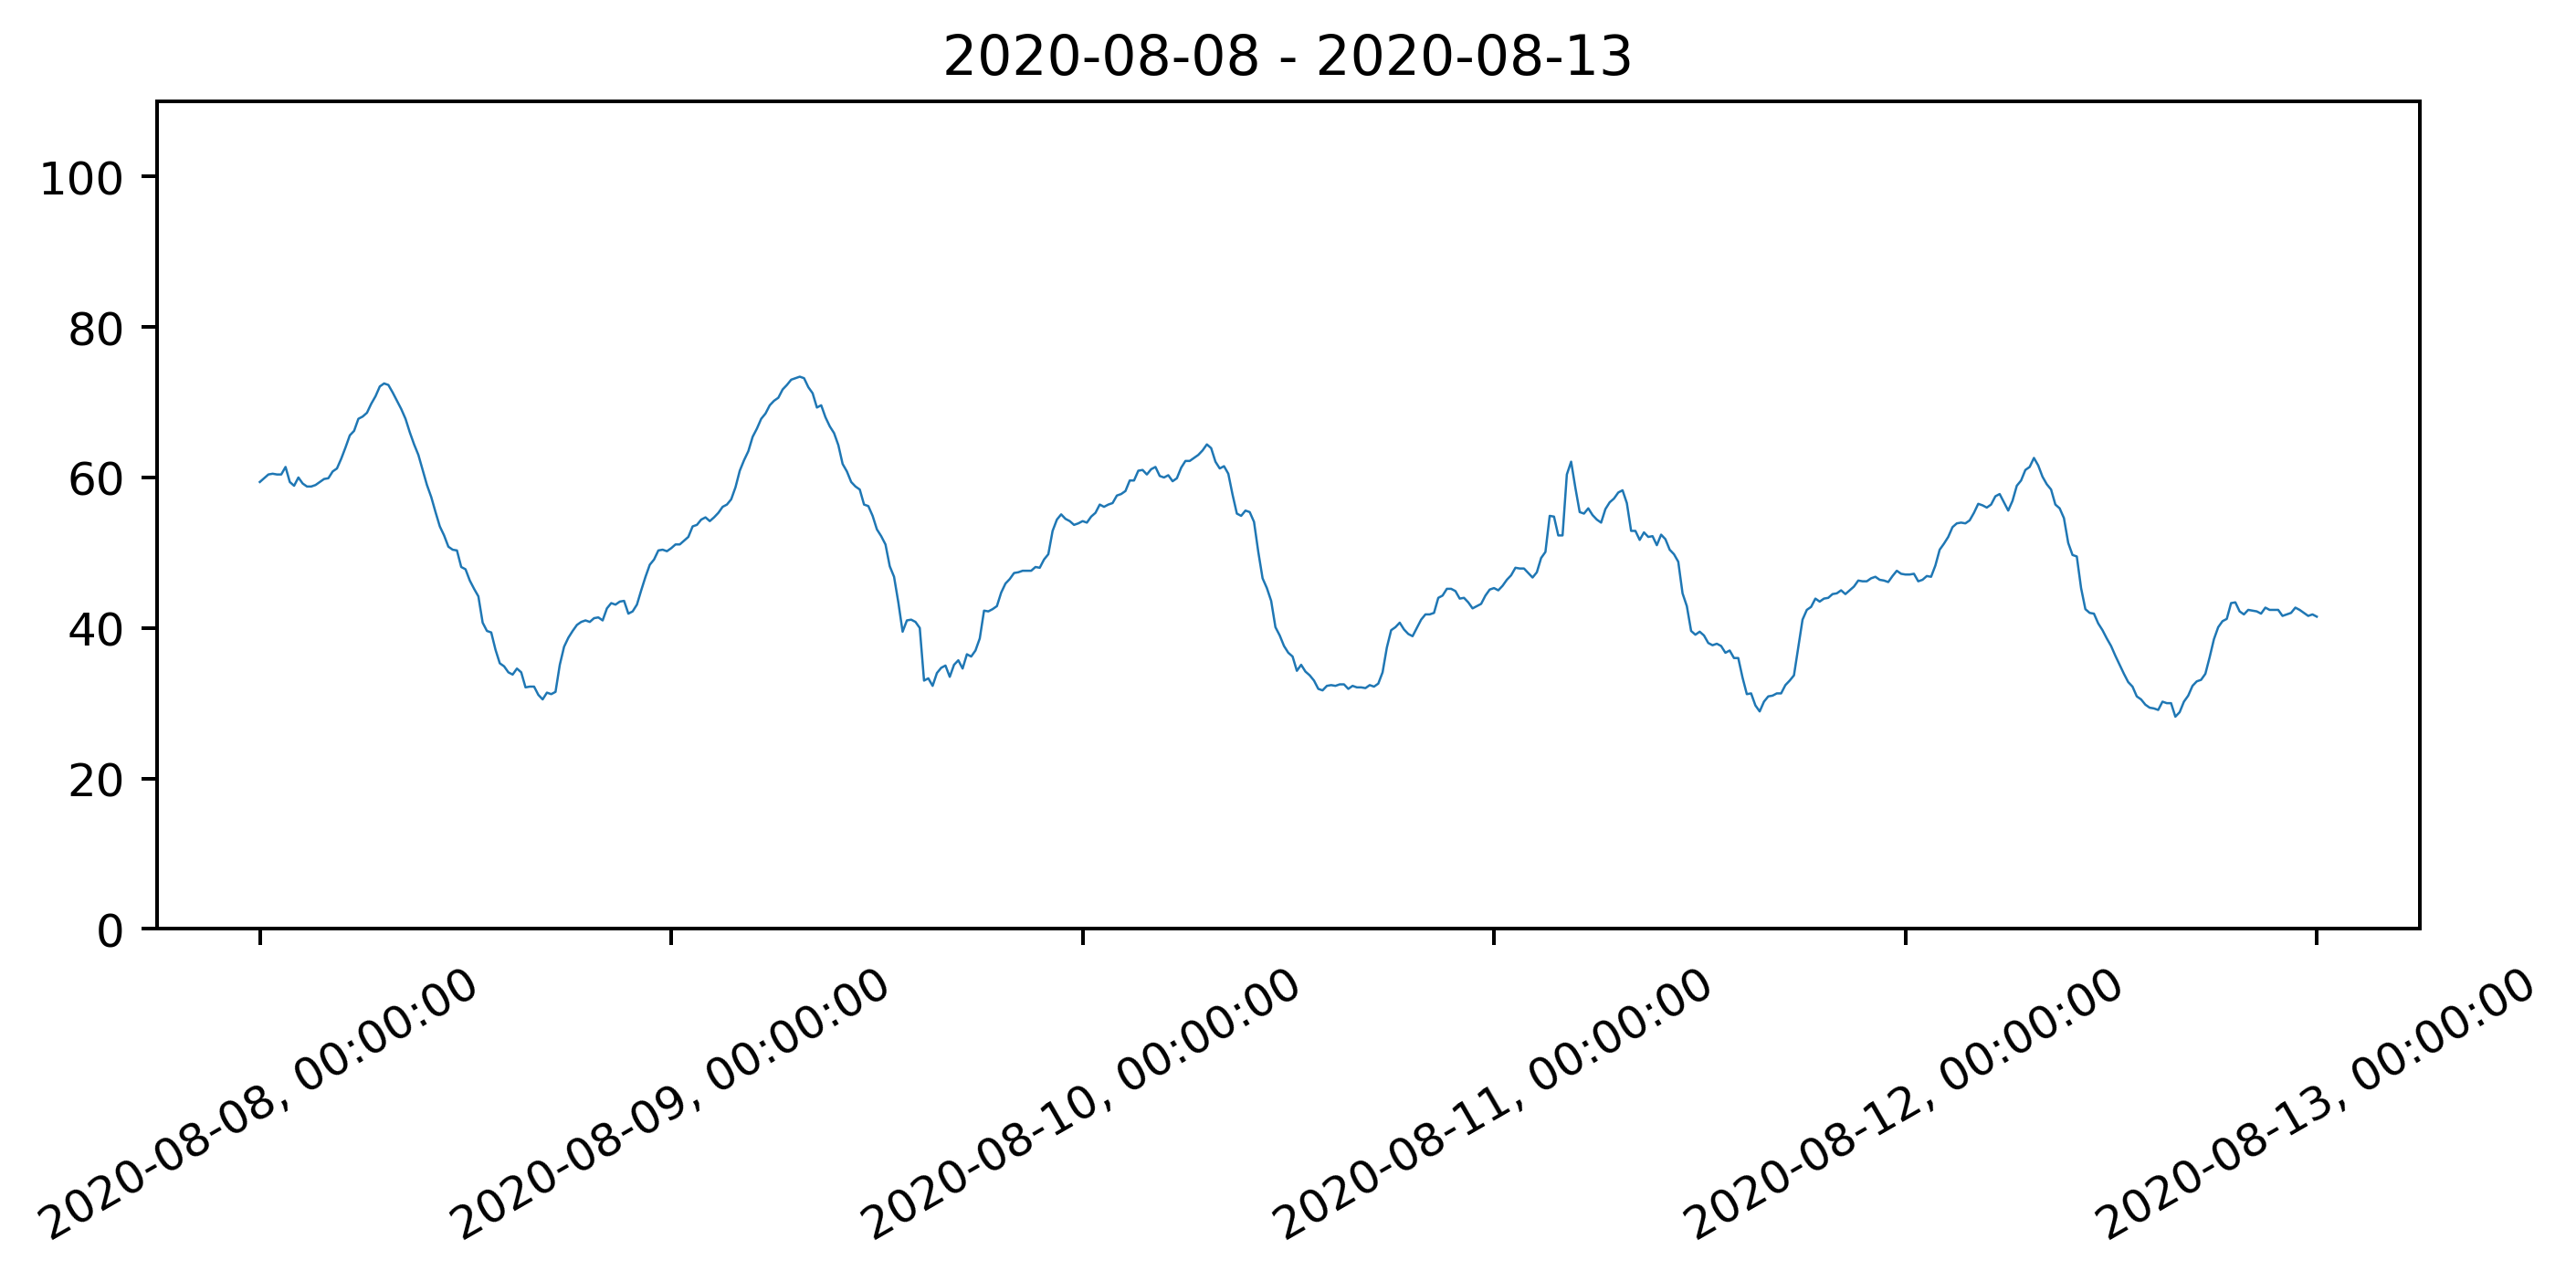

Pos 77, dia: 2016-06-24 hora: 07:30:00
Pos 114, dia: 2016-06-24 hora: 16:45:00
Pos 215, dia: 2016-06-25 hora: 18:00:00
Pos 305, dia: 2016-06-26 hora: 16:30:00
Pos 371, dia: 2016-06-27 hora: 09:00:00
{0: [{'Root': 371}], 1: [{'L': 77}], 2: [{'LR': 215}], 3: [{'LRL': 114}, {'LRR': 305}]}


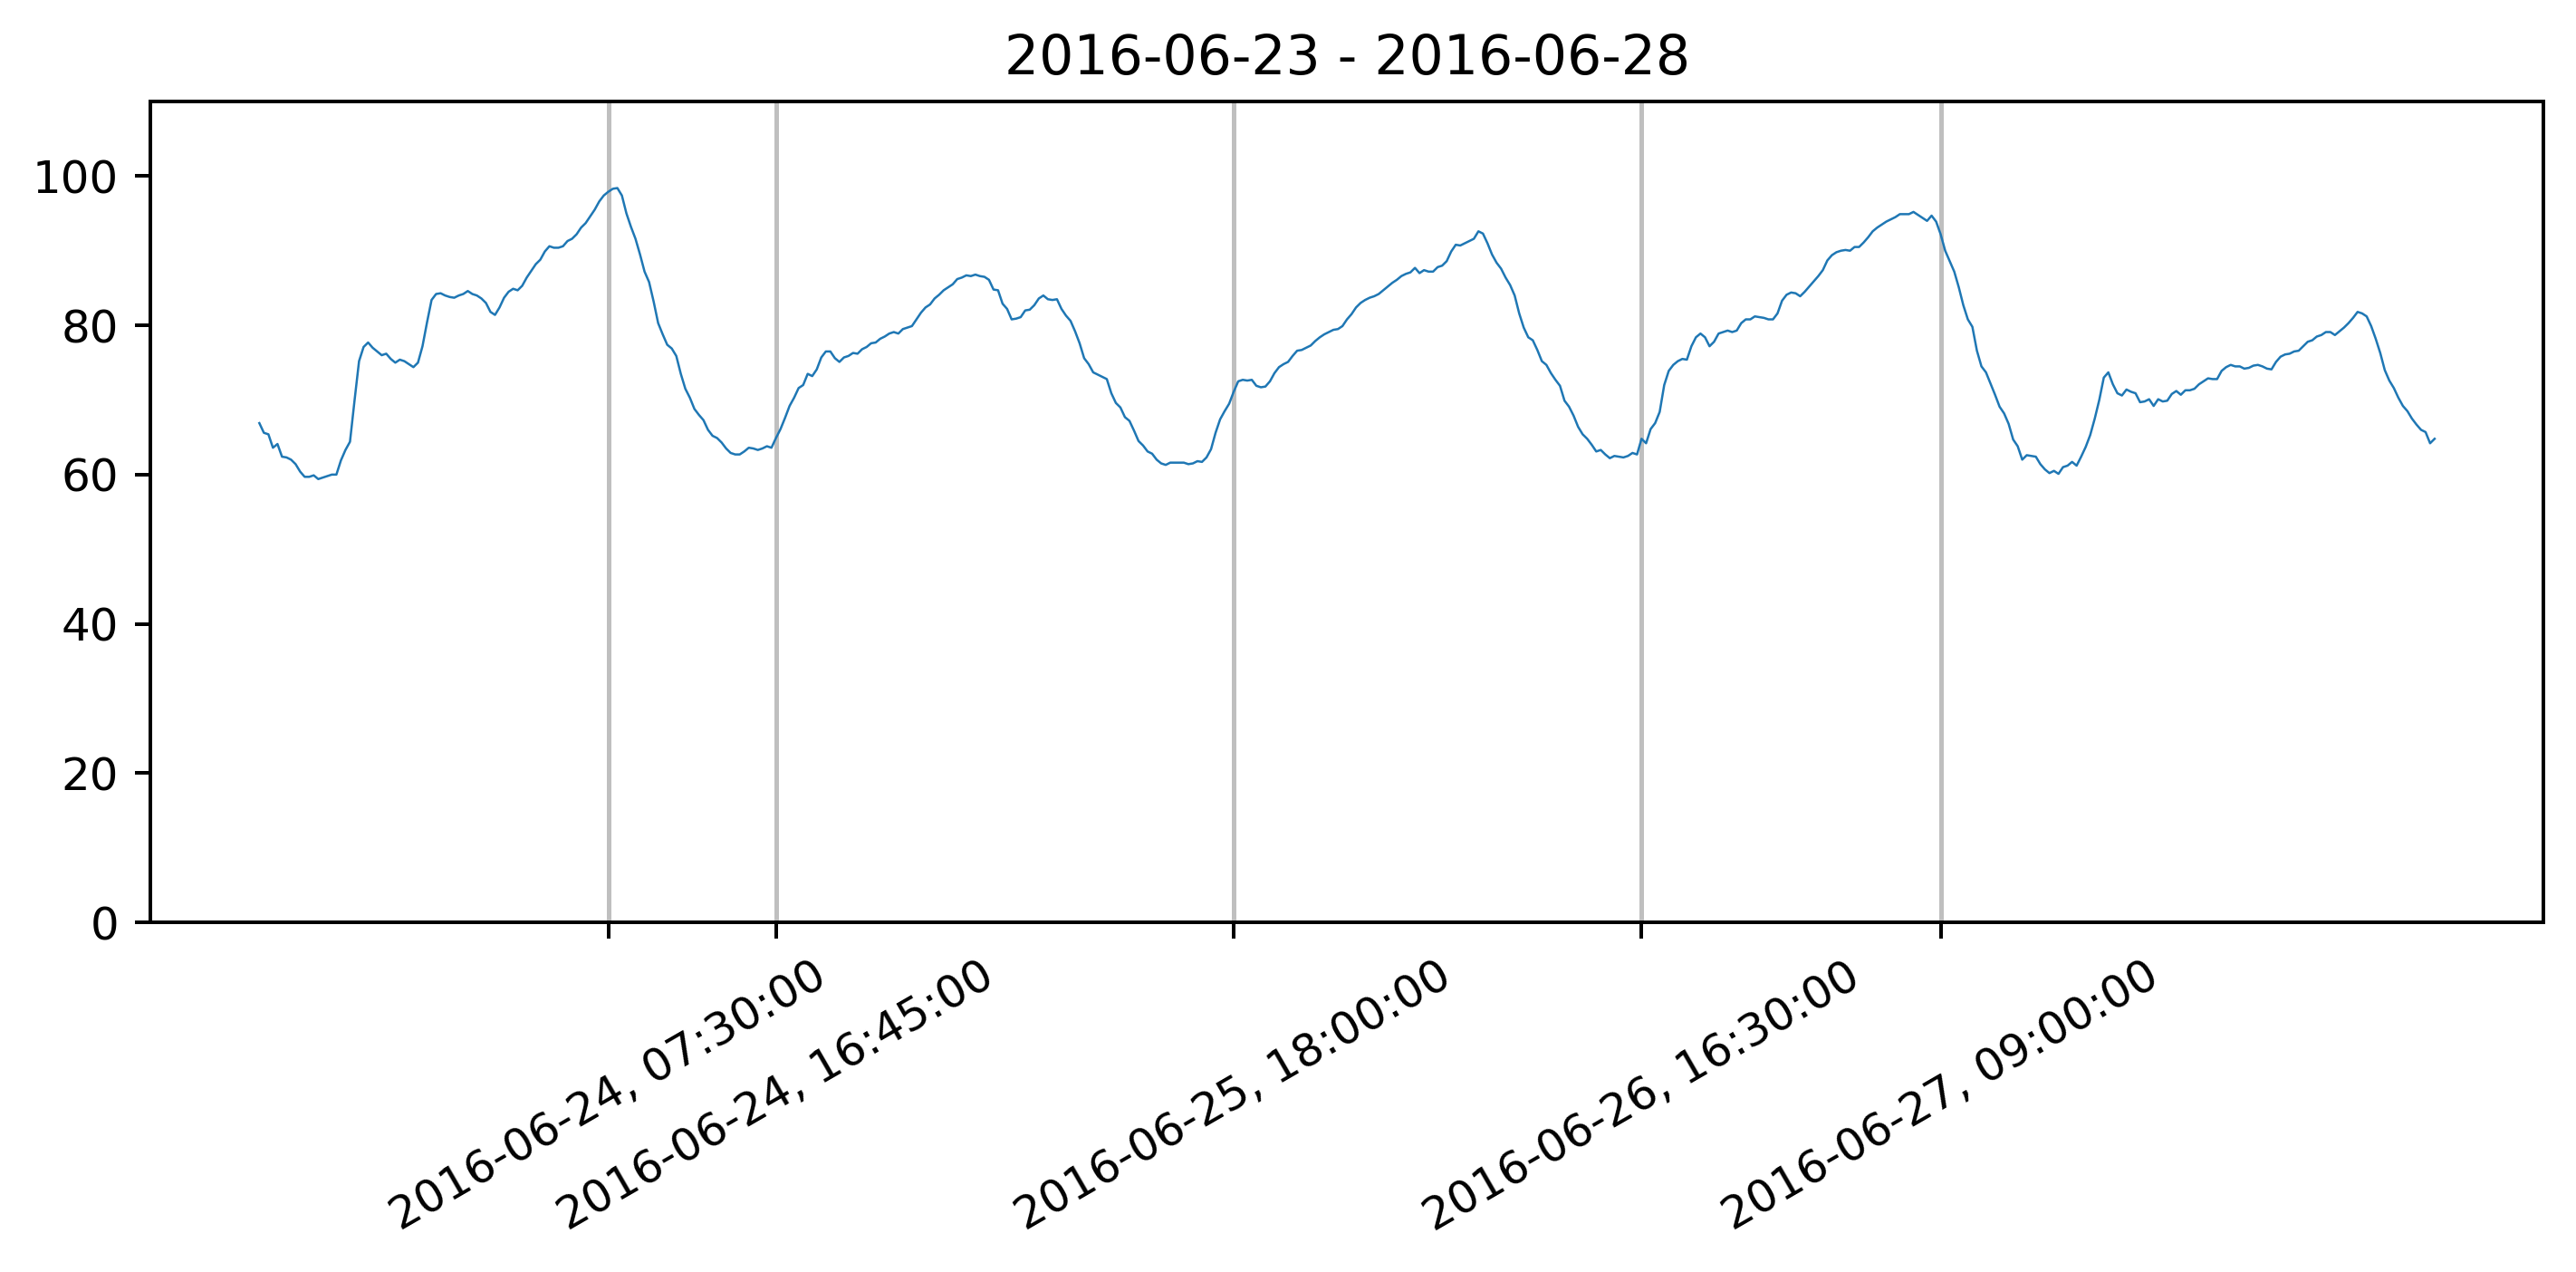

{0: [371], 1: [77], 2: [215], 3: [114, 305]}


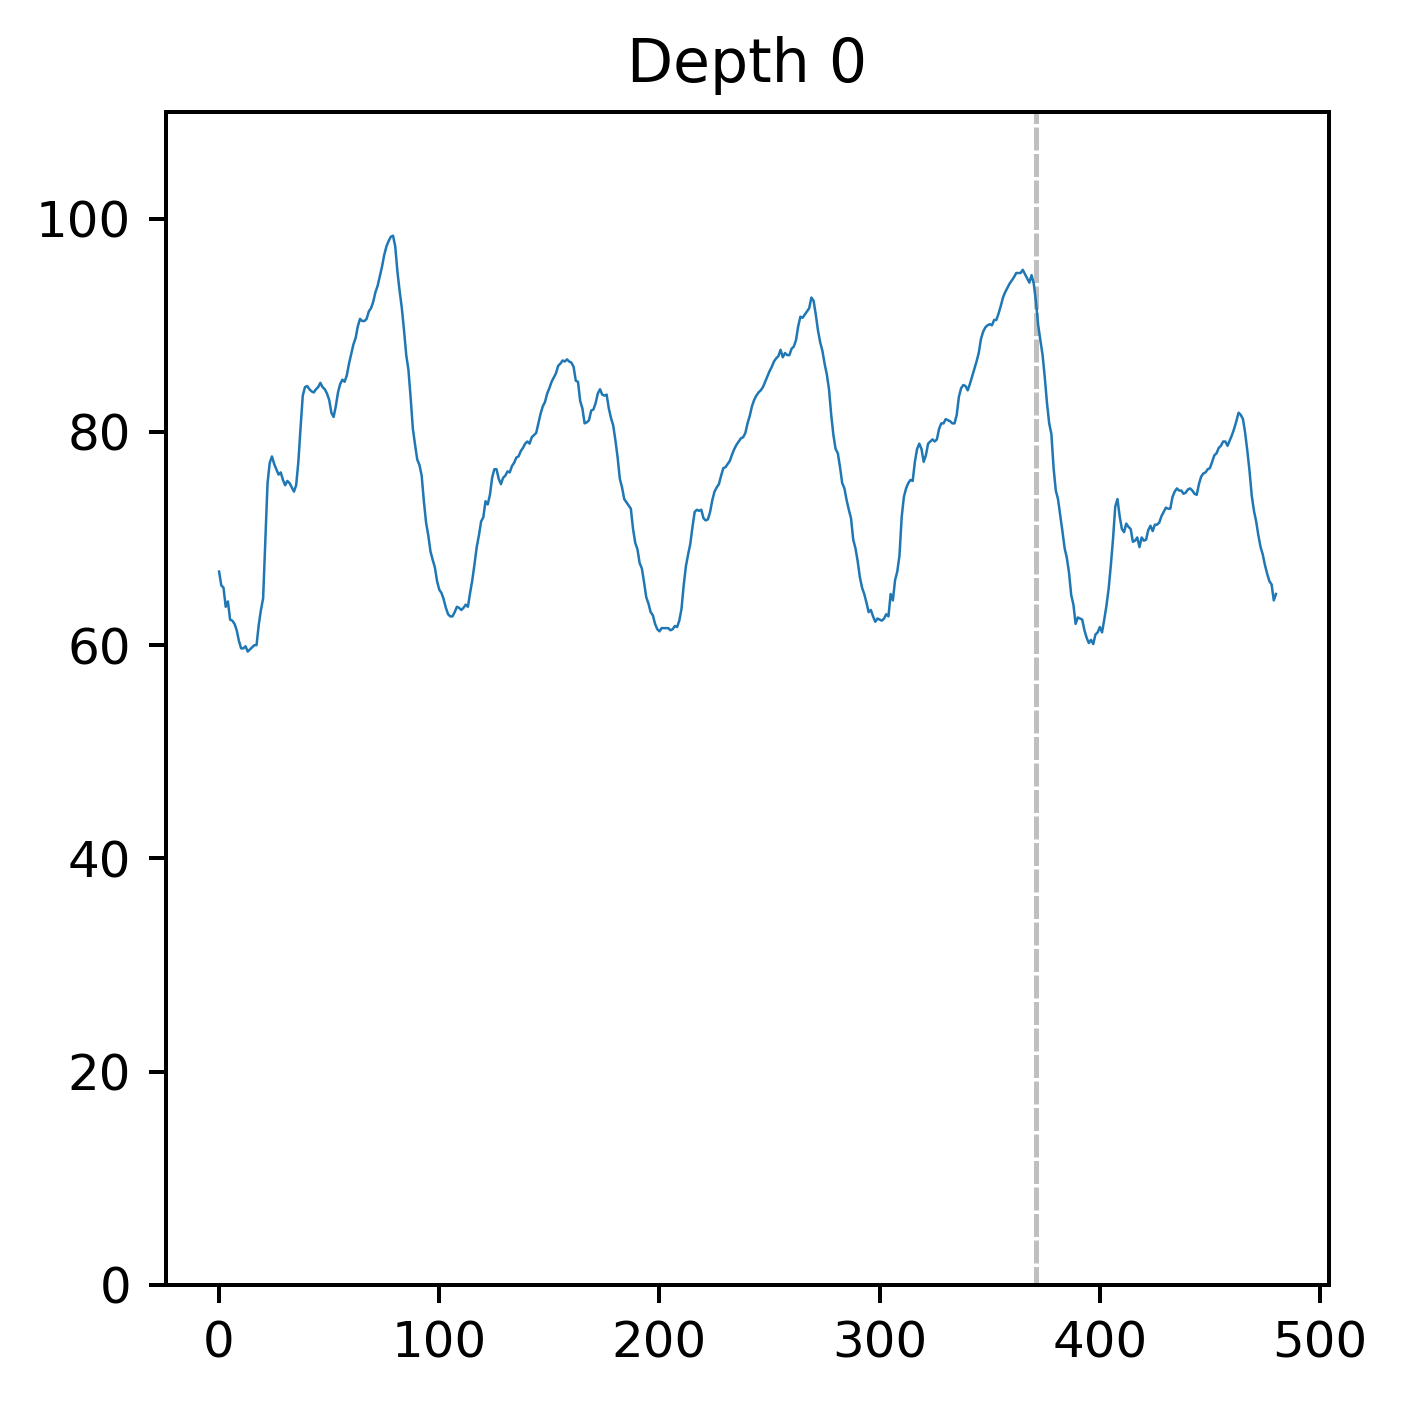

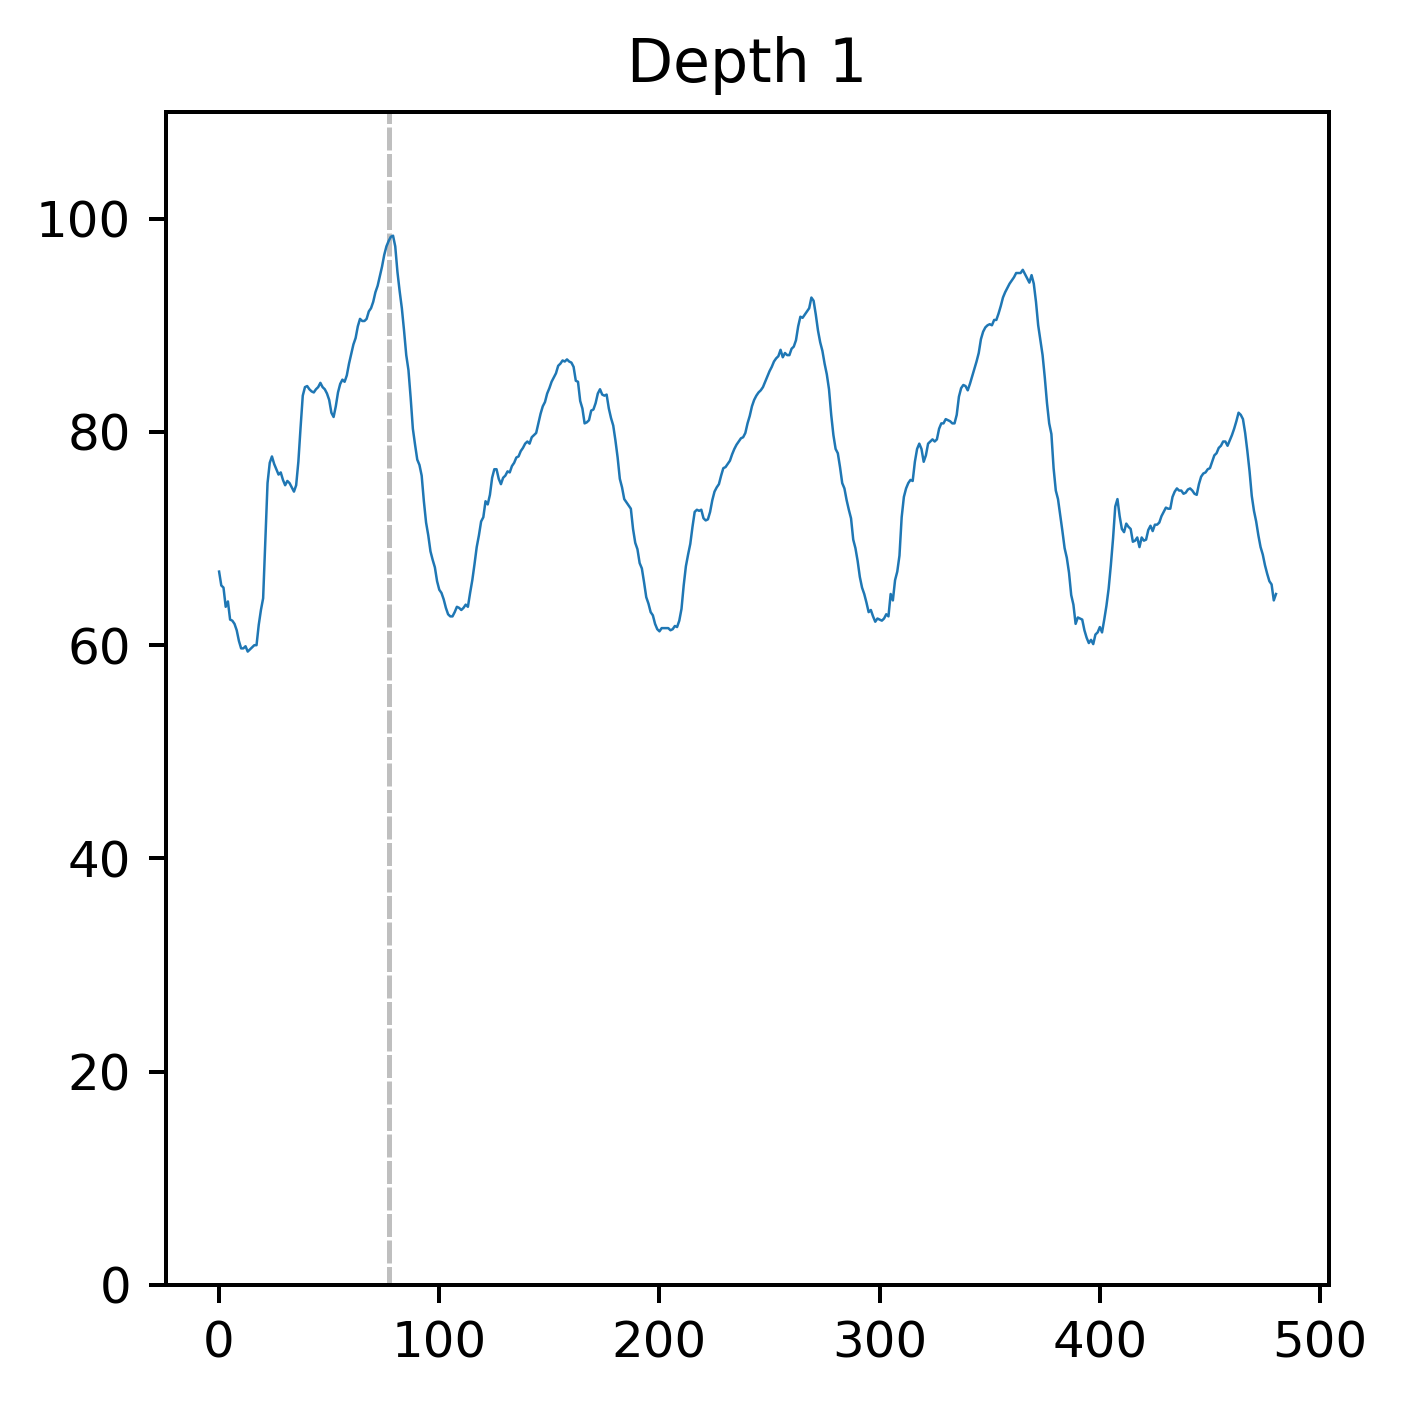

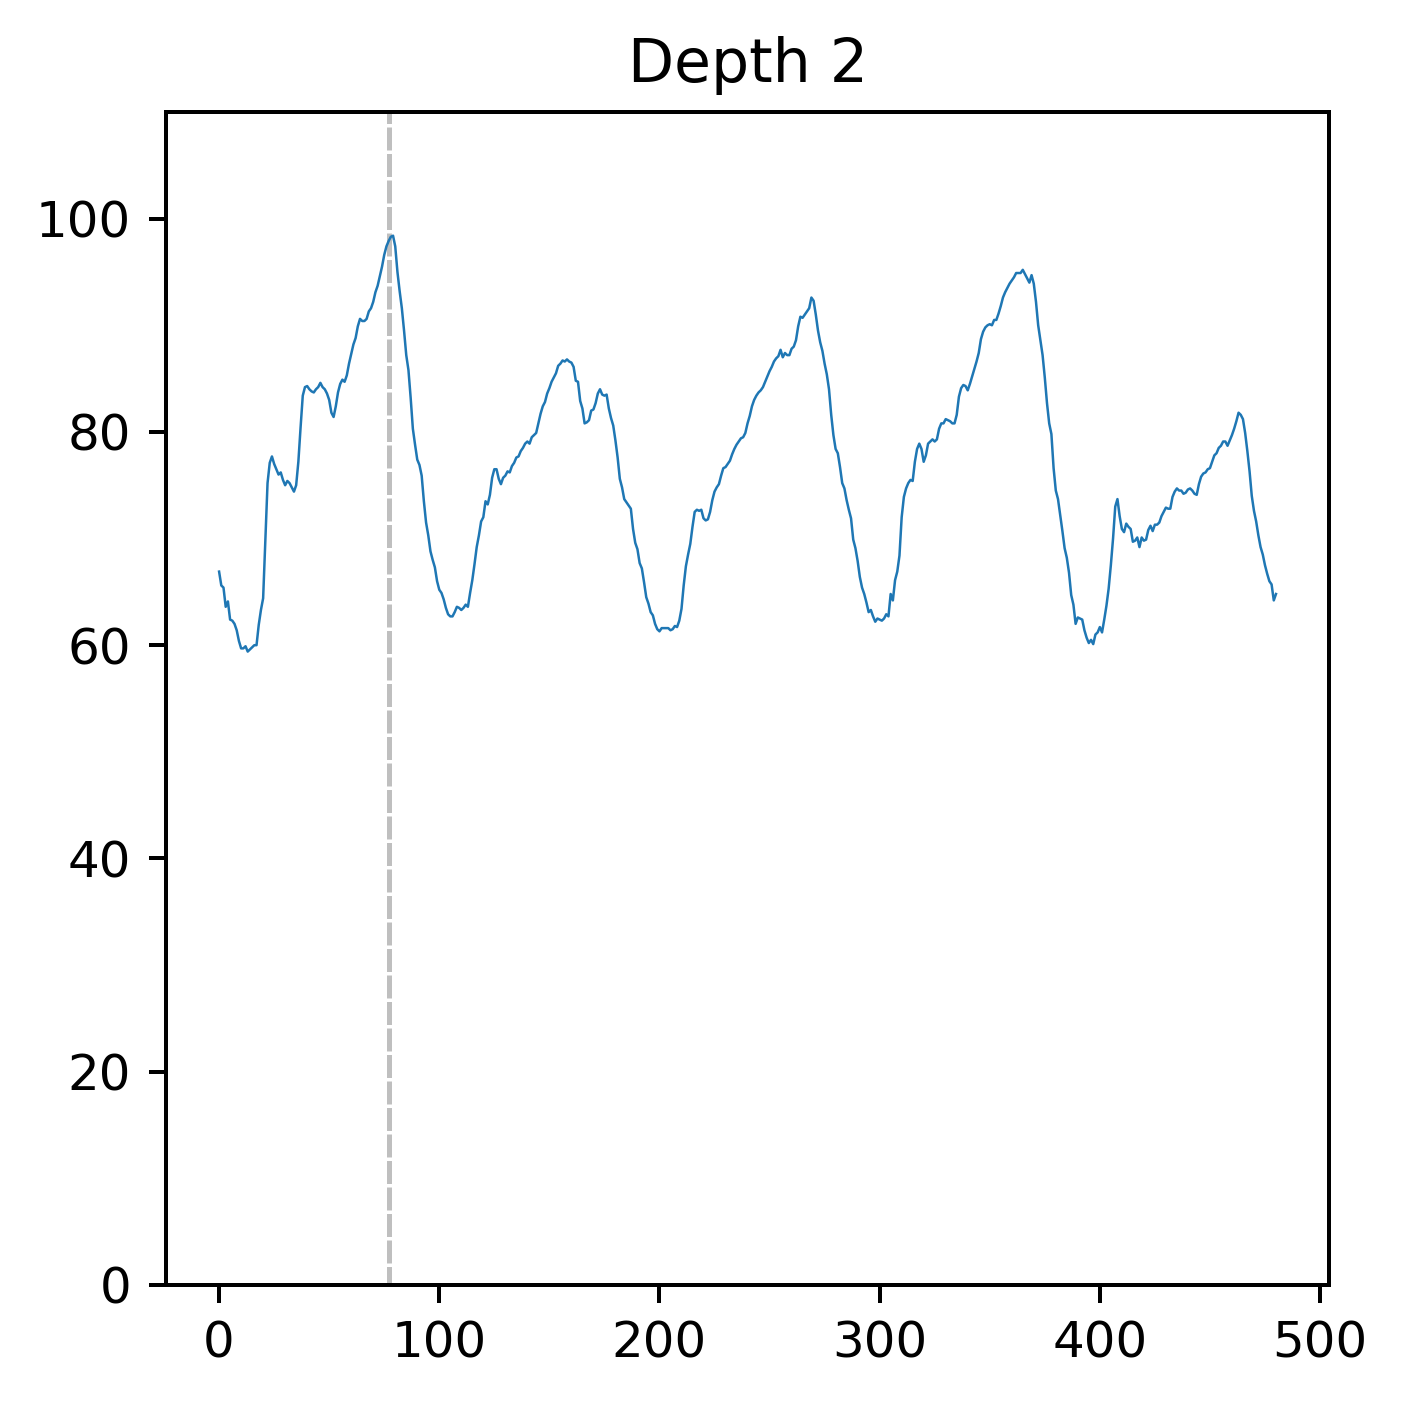

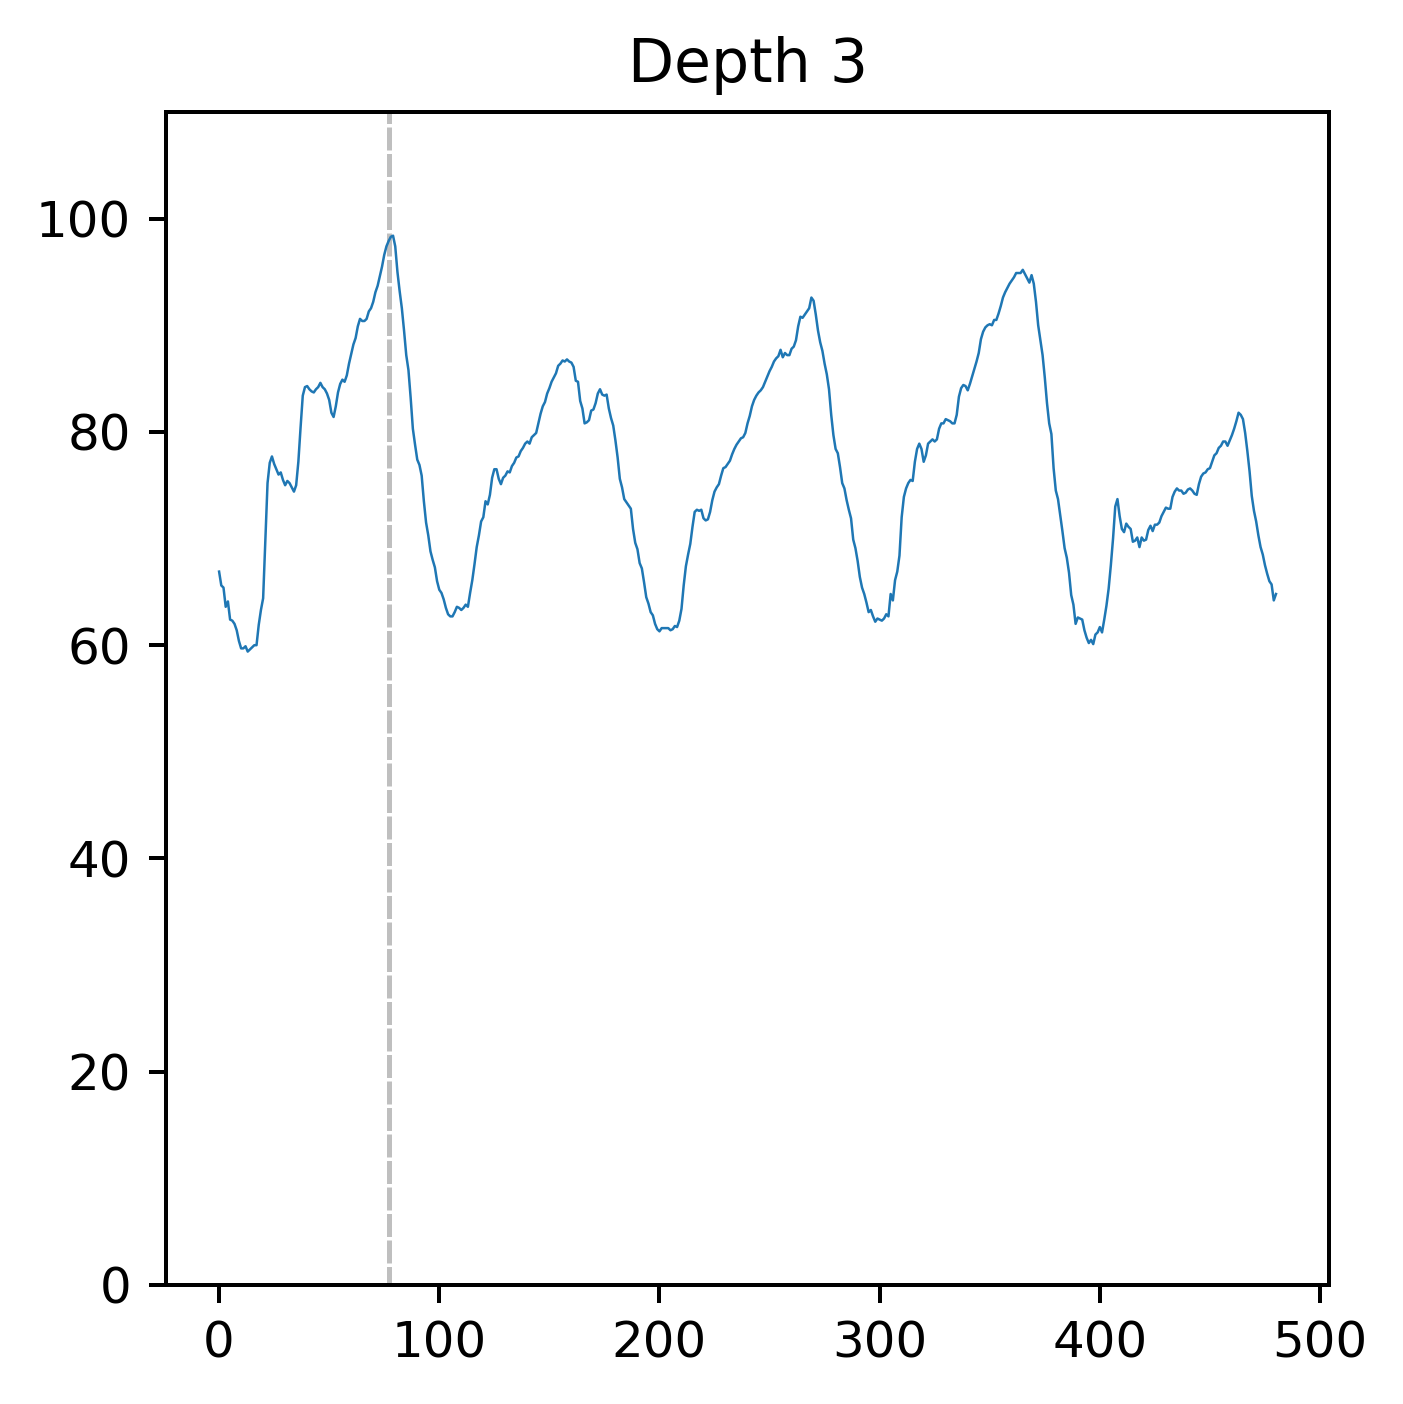

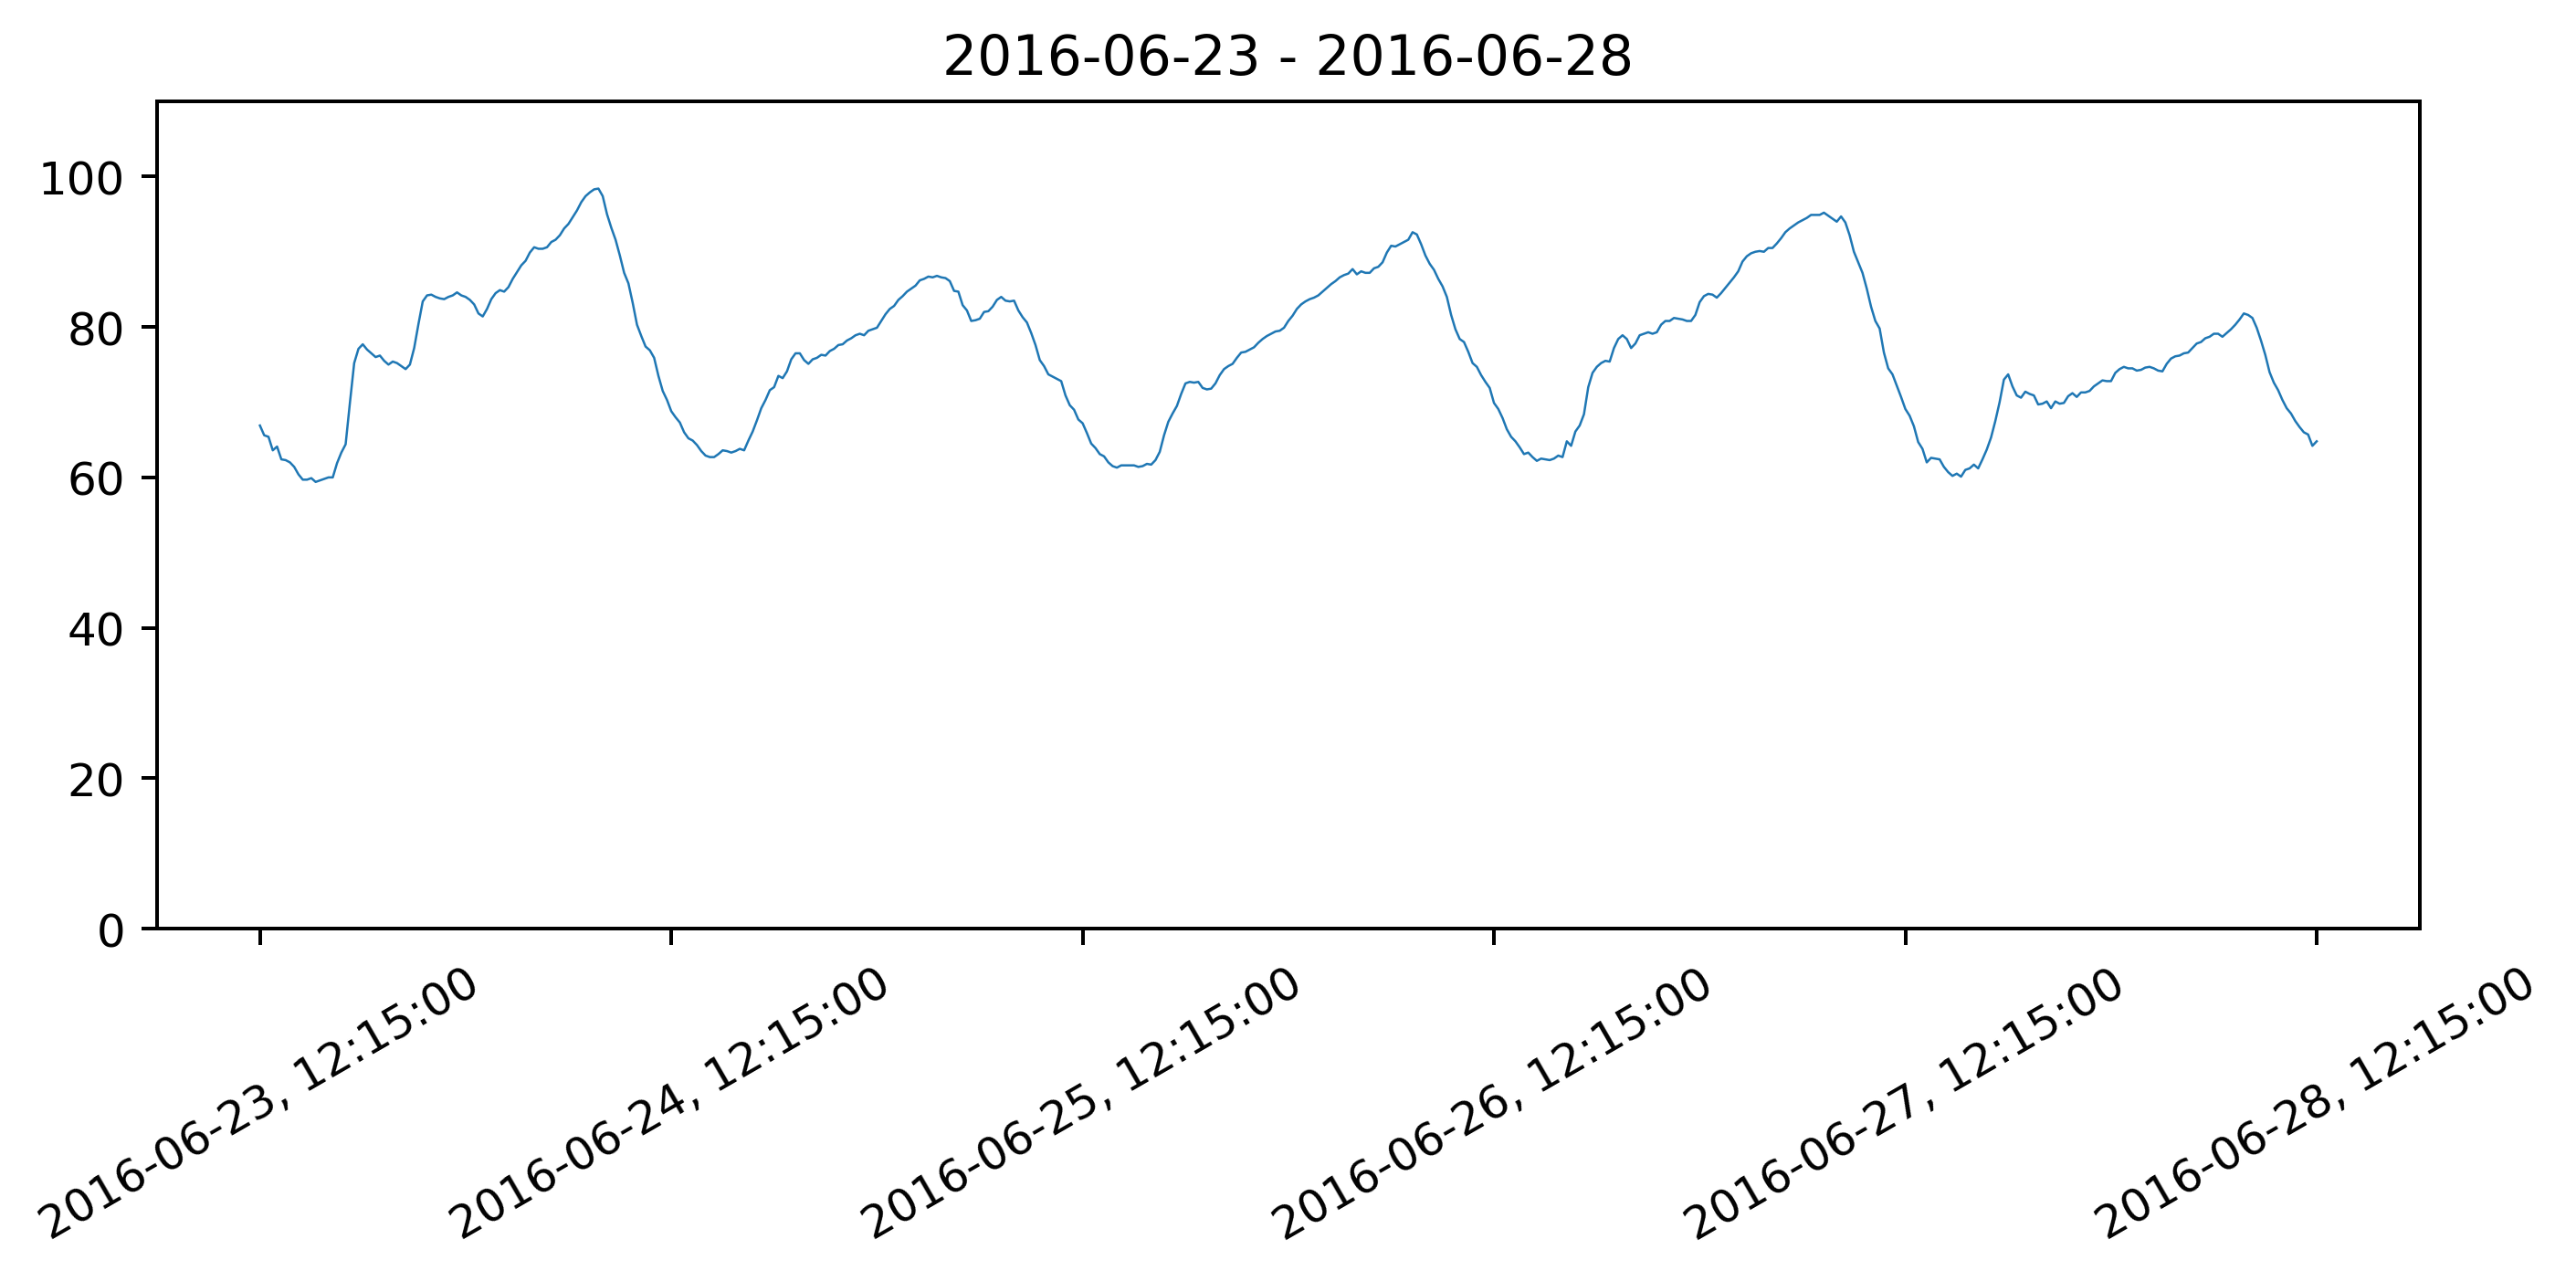

In [4]:
# Análise séries boas
for file in series_boas:
    df = pd.read_csv(f'./datasets/umidrelmed2m/5dias/{file}')
    series = df[df.columns[-1]]
    dates = np.array(df['date'])
    hours = np.array(df['hour'])
    series = np.where(np.isnan(series), 0, series)
    model = XTSTreePageHinkley(stop_condition='adf', stop_val=0, max_iter=100, min_dist=30)
    model = model.create_splits(series)
    if len(model.cut_points()) == 0:
        continue
    for seg in model.cut_points():
        print(f'Pos {seg}, dia: {dates[seg]} hora: {hours[seg]}')
    print(model.summary())
    file = file.split('.')[0]
    plot(
      series, figsize=(8, 4),
      divisions=model.cut_points(),
      title=f'{"-".join(file.split("_")[2:])}',
      labels= [{'x': i, 'label': f'{dates[i]}, {hours[i]}'} for i in model.cut_points()],
      labelrotation=30,
      max_y=110, min_y=0,
      img_name=f'{"-".join(file.split("_")[2:])}_segments.pdf',
      # save=True
    )
    plot(
      series, figsize=(8, 4),
      title=f'{"-".join(file.split("_")[2:])}',
      labels= [{'x': i, 'label': f'{dates[i]}, {hours[i]}'} for i in range(0, len(series), 96)],
      labelrotation=30,
      max_y=110, min_y=0,
      img_name=f'{"-".join(file.split("_")[2:])}.pdf',
      # save=True
    )

In [ ]:
# Coletar séries boas
child_files = next(os.walk(f'datasets/umidrelmed2m/5dias'))[2]
all_files = list(child_files)

series_boas = []

for file in all_files:
    df = pd.read_csv(f'./datasets/umidrelmed2m/5dias/{file}')
    series = df[df.columns[-1]]
    dates = np.array(df['date'])
    hours = np.array(df['hour'])
    series = np.where(np.isnan(series), 0, series)
    model = XTSTreePageHinkley(stop_condition='adf', stop_val=0, max_iter=100, min_dist=30)
    model = model.create_splits(series)
    if len(model.cut_points()) == 0:
        continue
    for seg in model.cut_points():
        print(f'Pos {seg}, dia: {dates[seg]} hora: {hours[seg]}')
    print(model.summary())
    plot(series, figsize=(8, 4), divisions=model.cut_points(), max_y=120, min_y=0, title=file,
         labels= [{'x': i, 'label': f'{dates[i]}, {hours[i]}'} for i in range(0, len(series), 96)])

    

    res = input()
    if res == 'y':
        series_boas.append(file)
    os.system('clear')
    clear_output(wait=True)